In [12]:
import numpy as np
import matplotlib.pyplot as plt
import thomsonpy.data_management.formatter as fmt
import thomsonpy.config.paths as paths
import thomsonpy.config.solar_imager_params as sip
import thomsonpy.constants.units as units
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [13]:
prefix = f"../../{paths.MODELS_PATH}"
model576 = fmt.load(f"{prefix}576p_allsun_6x6rsol_32s.np")
model2321 = fmt.load(f"{prefix}2321p_allsun_6x6rsol_32s.np")

/home/aliciavr/miniconda3/envs/iaa/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


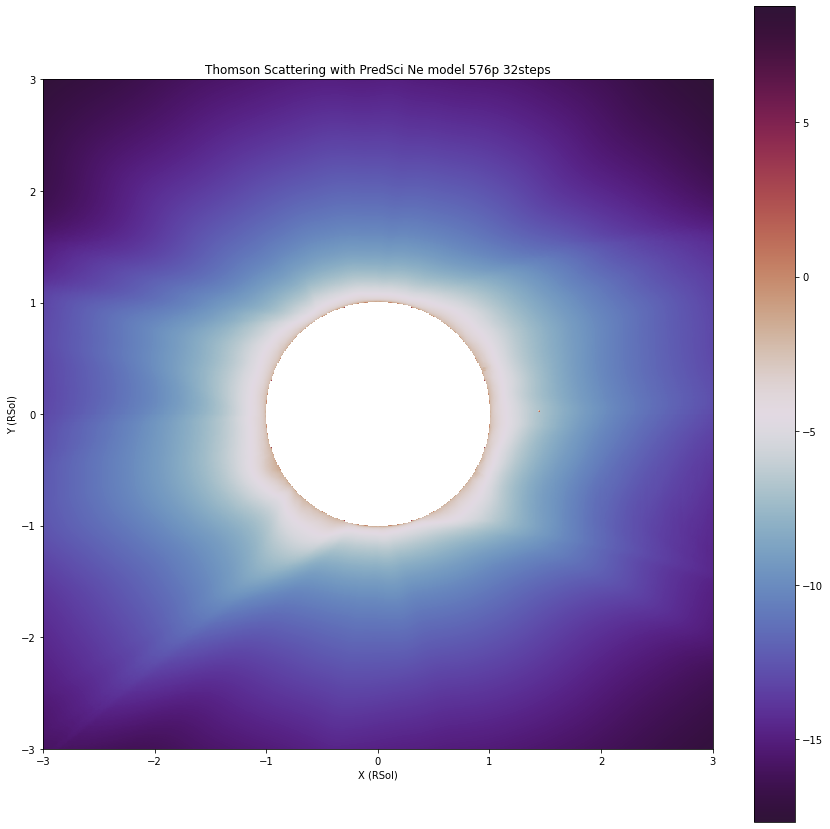

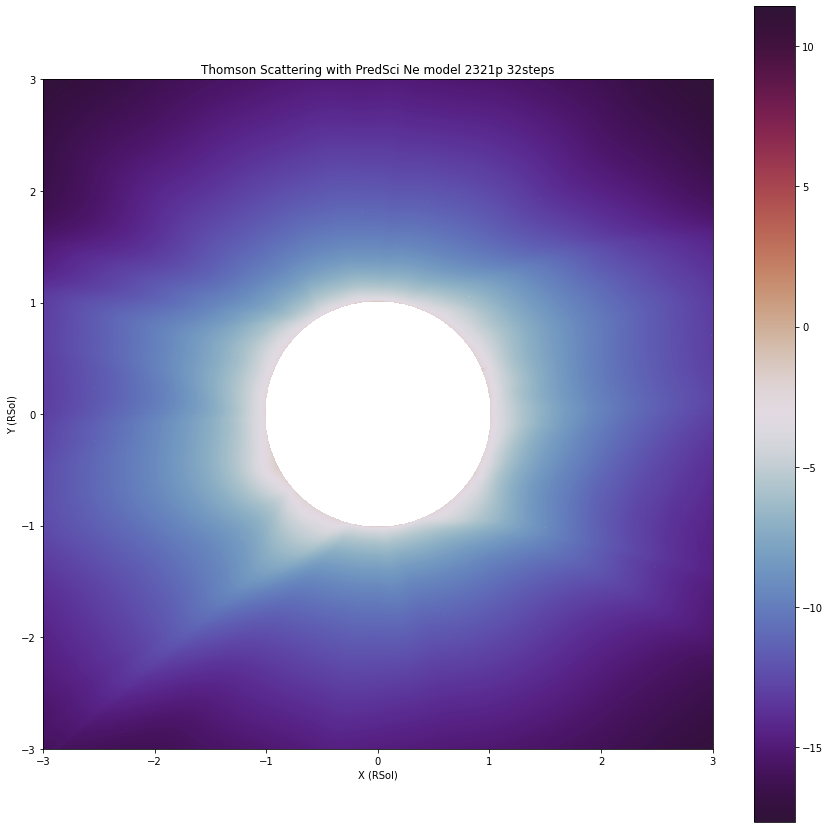

In [14]:
"""
Visualization of the ThomsonScattering.
"""
"""
cmap
['rainbow', 'nipy_spectral', 'gist_ncar', 'viridis', 'twilight', 'twilight_shifted', 'bone']
"""

"""
interpolation
'none', 'antialiased', 'nearest', 'bilinear', 
'bicubic', 'spline16', 'spline36', 'hanning', 
'hamming', 'hermite', 'kaiser', 'quadric', 
'catrom', 'gaussian', 'bessel', 'mitchell', 
'sinc', 'lanczos', 'blackman'

"""

"""
interpolation_stage{'data', 'rgba'}, default: 'data'
"""
steps = [32, 32]
points = [576, 2321]
models = [model576, model2321]

for i in range(len(models)):
    m = models[i]
    p = points[i]
    s = steps[i]
    plt.figure(figsize=(15, 15))
    plt.title(f"Thomson Scattering with PredSci Ne model {p}p {s}steps")
    plt.ylabel("Y (RSol)")
    plt.xlabel("X (RSol)")
    model_log = np.log(m)
    plt.imshow(model_log, 
               cmap = 'twilight_shifted', 
               interpolation = 'antialiased',
               interpolation_stage = 'data',
               extent=[sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL, sip.MIN_COORD * units.METERS_TO_RSOL, sip.MAX_COORD * units.METERS_TO_RSOL])
    plt.colorbar()

In [15]:
"""
Models comparison
"""
def imshow_model(model, description, ax, fig, **kwargs):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
                                  
    im = ax.imshow(model, **kwargs)

    ax.set_xlabel(f" X [RSol]") # Set the axis label in the form "Variable description [units]"
    ax.set_ylabel(f" Y [RSol]") # Set the axis label in the form "Variable description [units]"
    ax.set_title(description)

    #ax.legend()
    fig.colorbar(im, cax = cax, orientation = 'vertical')

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import thomsonpy.data_management.formatter as fmt
import thomsonpy.config.paths as paths
from mpl_toolkits.axes_grid1 import make_axes_locatable
prefix = f"../../{paths.MODELS_PATH}"
m = model2321
p = 2321
s = 32
my_dpi=96
fig, ax = plt.subplots()
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='7%', pad=0.6)
ax.set_title(f"Integrated Thomson scattered sunlight with PSI\n Ne model with {s}steps ({p}x{p} pixels)", fontsize = 'medium')
ax.set_ylabel("Y (RSol)", fontsize = 'medium')
ax.set_xlabel("X (RSol)", fontsize = 'medium')

#fig.set_size_inches(p/my_dpi, p/my_dpi)
fig.set_dpi(p)
model_log = np.log(m)
im = ax.imshow(model_log, 
           cmap = 'twilight_shifted', 
           interpolation = 'antialiased',
           interpolation_stage = 'data',
           extent=[-3, 3, -3, 3])
fig.colorbar(im, cax = cax, orientation = 'vertical')
fig.savefig(f"{prefix}thomsonscatt{p}p{s}s.png", dpi = my_dpi)

/home/aliciavr/miniconda3/envs/iaa/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
